# Autonomní diferenciální rovnice



```{admonition} Co se dozvíte v tomto textu
![](pics/Diomedea_exulans.jpg)

V tomto textu se budeme věnovat diferenciálním rovnicím, kde rychlost vývoje sledované veličiny nezávisí explicitně na čase, ale jenom na veličině samotné a na parametrech prostředí. Naprostá většina modelů splňuje tyto požadavky. Důsledkem nezávislosti na čase je jistá jednoduchost při kvalitativním popisu chování řešení. 

Důležitým reprezentantem autonomních diferenciálních rovnic je logistická rovnice, která bývá výchozím kamenem při studiu rostlinných a živočišných populací a označení parametrů z této rovnice písmeny $r$ a $K$ dalo dokonce název základním životním strategiím živočichů i rostlin. 

*Foto: Albatros (Diomedea exulans) v letu. Tento pták je představitelem K-stratégů. Autor JJ Harrison , <https://wikimedia.org>.*
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

Diferenciální rovnice $$ \frac{\mathrm dx}{\mathrm dt}=f(x)$$ s neznámou funkcí
$x(t)$ proměnné $t$ se nazývá *autonomní*, nebo též nezávislá na čase. Proměnná
$t$ se nazývá čas. 

Rovnici je možné řešit analytickou cestou. My se nebudeme zaměřovat na hledání
analytického tvaru obecného řešení, ale pokusíme se popsat chování řešení, aniž
bychom tato řešení znali. Pokusíme se s co nejmenší námahou říct, jak se budou
řešení chovat.

* Je-li $f(x_0)=0$, je konstantní funkce $x(t)=x_0$ řešením rovnice. Protože
  derivace konstantní funkce je nula, vidíme, že řešením rovnice $$f(x)=0$$
  obdržíme všechna konstantní řešení rovnice. Tato konstantní řešení se 
  nazývají *stacionární body*.
* Stacionární body a jim odpovídající konstantní řešení představují rovnovážný
  stav. Často nás zajímá, jestli při vychýlení z tohoto rovnovážného stavu má
  systém tendenci se vrátit do původního stavu, nebo se od původního stavu dále
  odchylovat.  
* Pokud se při malém vychýlení z rovnovážného stavu systém do tohoto stavu
  vrací, mluvíme o *stabilním stacionárním bodu*.
* Pokud se systém po malé výchylce do tohoto rovnovážného stavu nevrací, ale
  vyvíjí se k dalšímu stacionárnímu bodu nebo neohraničeně, 
  mluvíme o *nestabilním stacionárním bodu.*

Následující věta umožní odlišit stabilní a nestabilní stacionární
body. Protože v přírodě dochází k drobným perturbacím neustále, udává
vlastně, které stacionární stavy jsou realizovatelné a můžeme je v
přírodě pozorovat a které jsou prakticky nerealizovatelné.

```{index} single: Věta; o stabilitě řešení
```

```{prf:theorem} Stabilita konstantních řešení
:nonumber:
Jestliže platí $f(x_0)=0$, je
  konstantní funkce $x(t)=x_0$ konstantním řešením rovnice
  $$\frac{\mathrm dx}{\mathrm dt}=f(x).$$ Toto řešení je stabilní
  pokud funkce $f$ v bodě $x_0$ klesá a nestabilní pokud funkce $f$ v bodě $x_0$ roste.
```

Protože funkce $f$ má ve stacionárním bodě nulovou funkční hodnotu, můžeme růst
nebo pokles této funkce odhalit i ze znaménka. Pokud se znaménko funkce ve
stacionárním bodě mění z kladného na záporné, potom funkce klesá. V opačném
případě roste.

Pravá strana bývá často rozdílem dvou faktorů, které působí proti sobě v tom
smyslu, že jeden definuje rychlost růstu a druhý rychlost poklesu sledované veličiny. V takovém případě se hodí následující důsledek předchozí věty.

```{prf:corollary} Stabilita konstantních řešení rovnice s rozdílem na pravé straně
:nonumber:
Jestliže platí $f(x_0)=g(x_0)$, je
  konstantní funkce $x(t)=x_0$ konstantním řešením rovnice
  $$\frac{\mathrm dx}{\mathrm dt}=f(x)-g(x).$$ Toto řešení je stabilní
  pokud je funkce funkce $f(x)-g(x)$ kladná v levém okolí a záporná v pravém okolí bodu $x_0$. V případě opačných znamének je tento bod nestabilní.
```

## Exponenciální růst

```{index} single: Model; exponenciálního růstu
```

Nejjednodušším modelem růstu populace je model vyjadřující situaci, kdy rychlost
růstu je úměrná velikosti populace. Takový růst je popsán diferenciální rovnicí
$$\frac{\mathrm dx}{\mathrm dt}=kx $$ a jeho analytickým řešením vyhovujícím
podmínce $x(0)=x_0$ je funkce $$x(t)=x_0 e^{kt}.$$ Model exponenciálního růstu
je vhodný pro svou jednoduchost, ale nemůže popisovat dlouhodobý vývoj populace,
protože při značné velikosti populace nedokáže daná lokalita populaci uživit.
Model se nazývá Malthusův model a je použitelný pouze v krátkých časových
intervalech a v situacích, kdy se neprojeví vnitrodruhová konkurence.

## Von Bertalanffyho růst

```{index} single: Model; von Bertalanffyho růstu
```

Dalším modelem růstu je model, kdy je růst omezen a rychlost růstu je úměrná vzdálenosti vzdálenosti od horní hranice. Původně byl formulován pro růst jedinců, kteří se mohou dožívat maximální výšky $L_\infty$. Podle tohoto modelu je výška $L$ dána vztahem $$\frac{\mathrm dL}{\mathrm dt}=k(L_\infty-L)$$
resp.  
$$\frac{\mathrm dL}{\mathrm dt}=k_0\left(1-\frac{L}{L_\infty}\right),$$
kde $k_0=\frac{k}{L_\infty}.$ Analytickým řešením modelu s počáteční podmínkou
$L(0)=L_0$ je funkce $$L(t)=L_\infty + (L_0-L_\infty)e^{-kt}.$$ Tento vztah
ukazuje, že rozdíl délky a cílové délky se exponenciálně snižuje. 

Kromě jedinců rostoucích rychlostí úměrnou množství chybějícímu do maximální
velikosti tato rovnice popisuje i procesy, kdy změnu sledované veličiny
způsobují dva faktory: růst konstantní rychlostí a pokles rychlostí úměrnou
velikosti. Potom má totiž rovnice tvar $$\frac{\mathrm dx}{\mathrm dt} = \alpha
-\beta x$$ a po vytknutí konstanty $\alpha$ nebo $\beta$ dospíváme (až na
označení) k rovnicím výše. Tento růst například odpovídá sledování
množství enzymů nebo bílkovin, které jsou produkovány konstantní rychlostí a
degradují rychlostí úměrnou množství, viz {cite}`alon` kapitola 1.4.

## Logistický růst

```{index} single: Model ; logistického růstu
```
```{index} Nosná kapacita prostředí
```
```{index} Invazní parametr
```

Modelem pro růst populací v prostředí s nosnou kapacitou prostředí, který je
všeobecně přijímán jako vhodný kompromis mezi přesností popisu a matematickou
jednoduchostí je Verhulst-Pearlův model růstu, vycházející z předpokladu, že
rychlost růstu populace v prostředí s omezenou nosnou kapacitou je úměrná
velikosti této populace a volnému místu v životním prostředí, nejčastěji vyjádřenému procentem z nosné kapacity. Pokud nosná
kapacita prostředí je $K$ a specifická rychlost růstu bez započtení konkurence
$r$, má model tvar $$\frac{\mathrm dx}{\mathrm dt}=rx\left(1-\frac xK\right)$$
při vyjádření rychlosti růstu a 
$$\frac 1x \frac{\mathrm dx}{\mathrm dt}=r\left(1-\frac xK\right)$$
při vyjádření specifické rychlosti růstu. Pro $x$ rovno nule je pravá strana rovnice se specifickou rychlostí růstu rovna $r$. Odpovídá to specifické rychlosti růstu populace, která roste v prostředí z nulové hodnoty. Proto se parametr $r$ nazývá *invazní parametr*.

Rovnici je možno přepsat do tvaru 
$$
\frac{\mathrm d \frac xK}{\mathrm d(rt)} = \frac {x}{K}\left(1-\frac xK\right)
$$
a po zavedení bezrozměrné velikosti populace $y=\frac xK$ a bezrozměrného času
$\tau = rt$ má rovnice tvar
$$
\frac{\mathrm d y}{\mathrm d\tau} = y(1-y).
$$
To znamená, že bez újmy na obecnosti můžeme v logistické rovnici považovat
nosnou kapacitu prostředí i inverzní parametr za jednotkové. Přesněji, vhodnou
volbou jednotek můžeme docílit toho, že v uvedených jednotkách budou tyto
konstanty numericky rovny jedné. Tohoto docílíme tak, že velikost populace se
nebude měřit v počtech kusů, ale v násobcích nosné kapacity prostředí. Podobně,
jednotka času se upraví tak, aby invazní parametr byl roven jedné. Tedy
jednotkou času bude doba, za jak dlouho by populace dorostla do nosné kapacity
prostředí, kdyby populace po celou dobu
rostla konstantní rychlostí odpovídající rychlosti růstu od nulové hodnoty.


```{prf:remark} r-stratégové a K-stratégové
:nonumber:
Prostředí, ve kterém se populace nacházejí, je stále vystaveno změnám a výkyvům.
To se odráží i na velikosti populace. Různé druhy živočichů se s těmito
perturbacemi vyrovnávají různým způsobem. Některé druhy mají takřka stabilní
stavy. Například populace albatrosů (*Diomedea exulans*) na ostrově Gough Island
zůstávala téměř konstantní cca 4000 jedinců od roku 1889 přinejmenším do roku
1971 (viz {cite}`alexander` kapitola 5.3). Takové živočišné druhy nazýváme
K-stratégy. Živočišné druhy, jejichž strategií je naopak se v příhodné době
rychle rozmnožit, nazýváme r-stratégy a při modelování vývoje populace se tento
faktor projevuje vysokým koeficientem $r$. Terminologie r-strategie a
K-strategie je připisována MacArthurovi a Wilsonovi, autorům teorie ostrovní
biogeografie. 
```

Více o logistické rovnici viz například {cite}`begon` kapitola 6.8, {cite}`murray` kapitola 1.1 a {cite}`tkadlec` str. 182.

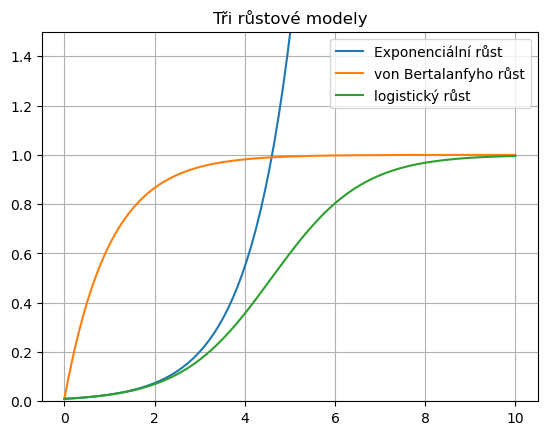

In [2]:
def exp_rust(t,x,k=1):
    return k*x
def log_rust(t,x,r=1,K=1):
    return r*x*(1-x/K)
def vB_rust(t,x,r=1,Lmax=1):
    return r*(Lmax-x)

meze = [0,10]
pocatecni_podminka = [0.01]
rovnice = [exp_rust, vB_rust, log_rust]

t = np.linspace(*meze,100)
popisky = ["Exponenciální růst","von Bertalanfyho růst","logistický růst"]
data = {
    popisek: 
       solve_ivp(
           r, 
           meze, 
           pocatecni_podminka, 
           t_eval=t).y[0] 
       for popisek,r in zip(popisky,rovnice)}
df = pd.DataFrame(index=t, data = data)

ax = df.plot()
ax.set(
    ylim=(0,1.5),
    title="Tři růstové modely"
    )
ax.grid()
ax.legend();

## Autoregulace a rychlost syntézy proteinů (volitelně)

> Tento text je zpracován podle knihy {cite}`alon` a pojednává o tom, jak zpětná vazba může ovlivnit produkci proteinu. Ukazuje několik strategií, jak může příroda zajistit, že v případě potřeby je protein syntetizován rychle a v dostatečném množství. Zaměříme se na matematickou stránku věci. Pěkná přednáška autora knihy a jednoho ze klíčových vědců v systémové biologii, moderní vědě, která se touto problematikou zajímá, je k dispozici na [Youtube zde](https://youtu.be/9Y55Y_c_KLk).

Uvažujme model syntézy proteinu, který degraduje rychlostí $s(x)=\beta x,$ kde
$\beta$ je konstanta, tj. rychlostí úměrnou množství proteinu $x$. To je
realistický a měřením potvrzený předpoklad. Kromě toho je protein ještě i
syntetizován jiným procesem. Při dosažení rovnováhy mezi degradací a produkcí je
jeho úroveň konstantní. 

Schopnost řízení syntézy správných proteinů ve správnou dobu je klíčová pro
všechny organismy. Pro některé jednodušší organismy je vzájemný řetězec na sebe
navazujících reakcí do značné míry zmapován a popsán. Tato spleť reakcí je
výsledkem dlouhodobé evoluce, kde náhodné genové mutace změnily chod dosud
zavedených věcí. Tyto mutace buď přinesly svému nositeli výhodu a udržely se a
rozšířily, nebo naopak přinesly nevýhodu a jejich nositel mutaci dále nešířil,
protože nebyl tak úspěšný v reprodukci. 

V této podkapitole si ukážeme, jak se dá různými strategiemi ovlivnit rychlost,
s jakou je v buňce syntetizován protein. Nejedná se o jedinou záležitost, kterou
v souvislosti s chemickými reakcemi v buňce studujeme matematickými prostředky.
Dalšími problémy jsou například stabilita a robustnost stacionárních stavů.
Přístupy jsou jak kvalitativní (může to takto vůbec fungovat?), tak
kvantitativní (dostáváme při předpovědích vypočtených z modelů správné numerické
hodnoty pro pozorované veličiny?) a v obou přístupech je dovednost modelování
pomocí diferenciálních rovnic nezastupitelnou pomůckou.

### Produkce konstantní rychlostí

Množství proteinu označme $x$ a předpokládejme produkci konstantní rychlostí.
Spolu s degradací z předchozího odstavce tedy máme model $$\frac{\mathrm
dx}{\mathrm dt}=\alpha - \beta x.$$

#### Nondimenzionalizace

Vhodnou volbou jednotek pro veličinu $x$ je možné docílit toho, že platí $\alpha
= \beta.$ Opravdu, rovnici je možno přepsat na tvar
$$\frac{\mathrm d x}{\mathrm dt}=\alpha \left(1- \frac{\beta x}{\alpha} \right)$$
a odsud po vynásobení faktorem $\frac \beta\alpha$
$$ \frac{\mathrm d\frac{\beta x}{\alpha}}{\mathrm dt}=\beta \left(1 - \frac{\beta x}{\alpha} \right), $$
což v nových jednotkách $X=\frac {\beta x}\alpha$ vede na rovnici 
$$\frac{\mathrm d X}{\mathrm dt}=\beta \left(1 - X \right).$$
Tato volba znamená, že množství proteinu měříme v procentech rovnovážného stavu.
Vhodnou volbou jednotky času je možné dosáhnout toho, že společná konstanta
$\beta$ je numericky rovna jedné. Tuto volbu však dělat nebudeme, protože chceme
porovnávat časový průběh pro různé hodnoty konstanty $\beta$. Pro pohodlí se
navíc vrátíme k původnímu označení malým písmenem, tj. budeme studovat rovnici 
$$
\frac{\mathrm d x}{\mathrm dt}=\beta \left(1 - x \right).$$
Toto je rovnice
$$
\frac{\mathrm d (x-1)}{\mathrm dt}=-\beta \left(x - 1 \right),
$$
tj. rovnice popisující rozklad rychlostí úměrnou množství pro veličinu $x-1$ a
řešením je tedy 
$$x(t)=1-(1-x_0) e^{-\beta t}. $$
Přestože máme k dispozici analytické řešení, vyřešíme si úlohu numericky,
abychom mohli poté volit různé rychlosti produkce.

#### Růstové křivky

Nejprve nakreslíme křivky produkce a degradace do jednoho obrázku, abychom
dokázali lokalizovat stacionární body.

* Křivky pro stejné hodnoty parametru jsou stejnou barvou. 
* Průsečík křivek stejné barvy je stacionární bod systému při nastavení
  parametrů daném příslušnou barvou. Všimněte si, že všechny tyto průsečíky jsou
  nad sebou a každý v jiné výšce. Pro všechny parametry nastává stacionární stav
  pro stejné množství proteinu $x=1$, ale rychlosti produkce a degradace se v
  tomto stacionárním stavu liší. 
* Všechna nastavení parametrů vykazují převažující růst pro malé a převažující
  degradaci pro velké hodnoty $x$. Stacionární body jsou tedy stabilní.

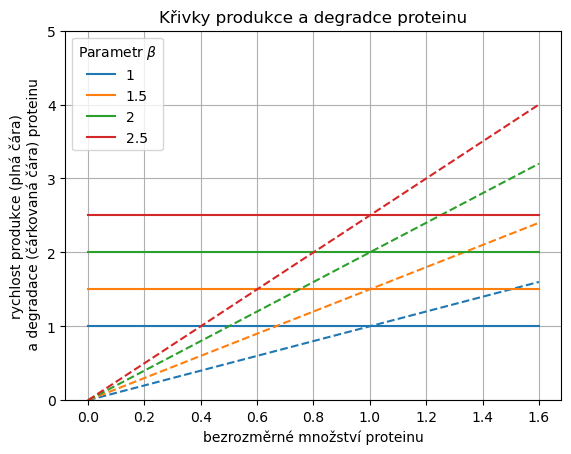

In [3]:
beta = [1,1.5,2,2.5]              # definice parametrů
x = np.linspace(0, 1.6, 100)  # definice intervalu pro kreslení růstových křivek
fig, ax = plt.subplots()

for i,beta_ in enumerate(beta):       # Cyklus přes parametry
    produkce = beta_+0*x       # Křivka produkce
    degradace = beta_*x        # Křivka degradace
    ax.plot(x,produkce, color="C"+str(i), label=beta_)     # Vykreslení křivky produkce
    ax.plot(x,degradace, "--", color="C"+str(i), label=None)    # Vykreslení křivky degradace

ax.set(title="Křivky produkce a degradce proteinu", 
       xlabel='bezrozměrné množství proteinu',
       ylabel='rychlost produkce (plná čára)\n a degradace (čárkovaná čára) proteinu',
       ylim=(0, 5)
       );
plt.legend(
    title=r"Parametr $\beta$"
    )
plt.grid();

#### Časový vývoj řešení

Průběh řešení pro jednotlivé hodnoty parametru u řešení vycházejícího z nulové
počáteční podmínky je na obrázku. V praxi nás zajímá, jak rychle bude dosaženo
určitého množství proteinu. Tedy vybereme si nějakou hladinu, například $0.6$, a
sledujeme, která křivka této hladiny dosáhne jako první a která jako poslední.

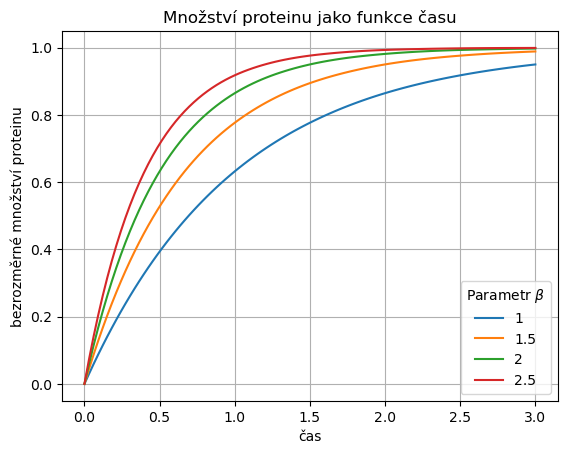

In [4]:
meze = [0,3]                # definice počátečního a koncového časového okamžiku
t = np.linspace(*meze, 100) # definice intervalu pro kreslení funkcí času
reseni = np.array([
    solve_ivp(
        lambda t, x: beta_ * (1 - x),
        meze, 
        [0], 
        t_eval=t).y[0]  
    for beta_ in beta
    ]).T

plt.plot(t,reseni)

ax = plt.gca()
ax.set(
    title="Množství proteinu jako funkce času", 
    xlabel='čas', 
    ylabel='bezrozměrné množství proteinu',
    )
plt.grid()
plt.legend(
    beta,
    title=r"Parametr $\beta$"
    );

#### Rychlá produkce je "zaplacena" rychlou degradací

Je patrné, že nejrychleji hladina enzymu roste pro nejvyšší hodnotu parametru.
Vodorovnou čáru ve výšce $0.6$ protne jako první křivka odpovídající nejvyšší
hodnotě parametru $\beta$. Být první je neskutečně důležité, někdy přímo otázka
života a smrti. Taková bakterie, která umí rychle produkovat enzym, například
umí rychle uniknout z prostředí s nepříznivými životními podmínkami (rychle
sestaví proteiny, které vytvoří jakýsi molekulární motor a ten buňku posune na
jiné místo) nebo umí rychle začít ukládat v přítomnosti glukózy energii pro
budoucí využití. Na druhou stranu, popsaným mechanismem je rychlost je dosažena
nejenom rychlou produkcí, ale i rychlou degradací proteinu. Tedy protein se
rychle produkuje a rychle rozpadá. Už z laického hlediska se takový postup nezdá
být postupem optimálním pro přežití. Je to jako bychom u auta chtěli mít možnost
okamžitě zrychlit a za tímto účelem udržovali vysoké otáčky motoru, ale abychom
jeli rozumnou rychlostí tak bychom brzdili. Tedy bychom současně šlapali na plyn
i na brzdu. To rozumný člověk nedělá.

Proteiny ve skutečnosti nejsou rychle odbourávány. Popsaný mechanismus šlapání
na brzdu a plyn současně v buněčném světě ve skutečnosti není použit. Životnost
proteinu není řádově odlišná od životnosti buňky. Příroda a evoluce by takové
plýtvání nepřipustily a namísto toho se k problému rychlé produkce proteinu
staví jinak. Použitím zpětné vazby, což je předmětem následující kapitoly.

#### Bezrozměrná formulace

Zkusíme ještě přepsat rovnici s konstantní produkcí do bezrozměrných jednotek. 
Rovnici 
$$\frac{\mathrm dx}{\mathrm dt}=\beta(1-x)$$
je možno přepsat do tvaru 
$$\frac{\mathrm dx}{\mathrm d(\beta t)}=1-x$$
a pro bezrozměrný čas $\tau = \beta t$ se rovnice redukuje na 
$$\frac{\mathrm dx}{\mathrm d\tau}=1-x.$$
Rovnice je nezávislá na parametrech a po převodu na bezrozměrný čas (tj. po
vynásobení času parametrem $\beta$) všechna řešení budou splývat. Protože v
grafu se budou překrývat, vykreslíme je různě širokými poloprůhlednými čarami.

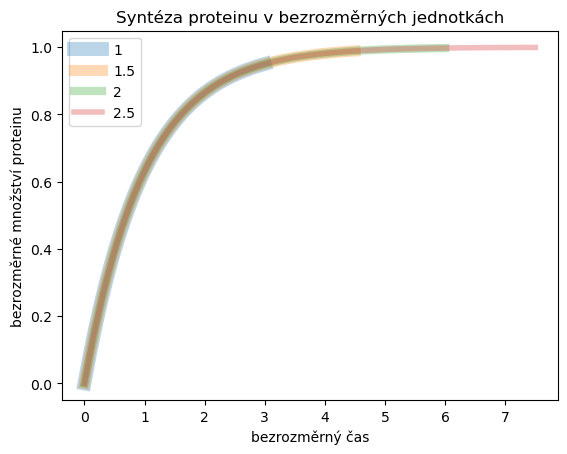

In [5]:
for i,beta_ in enumerate(beta):
    plt.plot(t*beta_,reseni[:,i],label=beta_,lw=(10-2*i),alpha=0.3)
ax = plt.gca()
ax.set(
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrné množství proteinu",
    title="Syntéza proteinu v bezrozměrných jednotkách"
)
plt.legend();

Vidíme názorně výhodu bezrozměrných jednotek. Není nutné řešit rovnici pro různé
hodnoty parametru, ale všechna řešení jsou až na transformaci stejná. Jinými
slovy vyjádřeno, v modelu 
$$\frac{\mathrm dx}{\mathrm dt}=\alpha-\beta x$$
produkce konstantní rychlostí je možno bez újmy na obecnosti položit oba
parametry $\alpha$ a $\beta$ rovny jedné.


### Produkce se zápornou zpětnou vazbou

Předpokládejme produkci proteinu rychlostí související s množstvím proteinu.
Jedná se tedy o model 
$$\frac{\mathrm dx}{\mathrm dt}=f(x) - \beta x,$$
kde $f(x)$ je rychlost produkce. Budeme porovnávat vliv funkce $f(x)$ na
rychlost syntézy. 

Vhodný tvar funkce $f(x)$ může být například 
rozdíl konstanty a třetí mocniny, tj. $$ f(x)=a-bx^3.$$ 

Čím vyšší hodnota koeficientu $\alpha$, tím je počáteční produkce rychlejší a
dříve je dosaženo potřebného množství enzymu. Toto se děje při konstantní zpětné
vazbě a konstantním stacionárním stavu (všechny rovnice mají člen popisující
degradaci ve tvaru $-x$ a stacionární stav $x=1$). 

#### Nondimenzionalizace

Vhodnou volbou jednotek pro veličinu $x$ dosáhneme toho, že stacionárním bodem
bude $x=1$ (jinými slovy, množství enzymu budeme měřit v procentech rovnovážného
stavu). Protože budeme uvažovat stále stejnou rychlost degradace a sledovat
jenom vliv funkce $f(x)$, můžeme jednotky času zvolit tak, že $\beta = 1$. Tj.
studujeme rovnici
$$\frac{\mathrm dx}{\mathrm dt}=f(x) - x,$$
kde $f(1)=1$.
Aby byla navíc splněna podmínka $f(1)=1$, budeme uvažovat funkci
$$f(x)=\alpha-(\alpha-1)x^3, \quad \alpha \geq 1.$$

#### Křivky růstu a degradace

Funkce $$f(x)=\alpha-(\alpha-1)x^3, \quad \alpha \geq 1$$ je klesající funkce.
Rychlost produkce tedy ubývá s množstvím. Toto se nazývá záporná zpětná vazba.
Parametr $\alpha$ reguluje sílu této zpětné vazby, čím je vyšší, tím je zpětná
vazba výraznější. Vyšší $\alpha$ charakterizuje vyšší hodnotu průsečíku na
svislé ose (rychlejší produkci při nulové hladině proteinu) a rychlejší pokles
při rostoucí koncentraci. Pěkně to je vidět na následujícím obrázku.

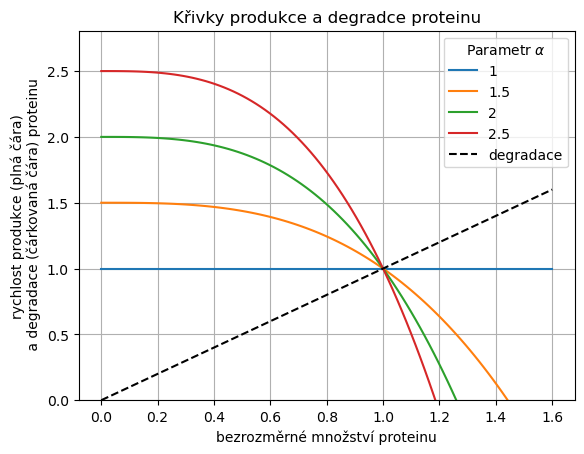

In [6]:
alpha = [1,1.5,2,2.5]              # definice parametrů
x = np.linspace(0, 1.6, 100)  # definice intervalu pro kreslení růstových křivek
fig, ax = plt.subplots()

for i,alpha_ in enumerate(alpha):       # Cyklus přes parametry
    produkce = alpha_ - (alpha_-1)*x**3 # Křivka produkce
    ax.plot(x,produkce, color="C"+str(i), label=alpha_)     # Vykreslení křivky produkce

ax.plot(x,x, "--", color="k", label="degradace")    # Vykreslení křivky degradace

ax.set(title="Křivky produkce a degradce proteinu", 
       xlabel='bezrozměrné množství proteinu',
       ylabel='rychlost produkce (plná čára)\n a degradace (čárkovaná čára) proteinu',
       ylim=(0, None)
       );
plt.legend(
    title=r"Parametr $\alpha$"
    )
plt.grid();

#### Časový průběh řešení modelu

Zkusíme si namodelovat průběh řešení modelu pro různé hodnoty parametru.

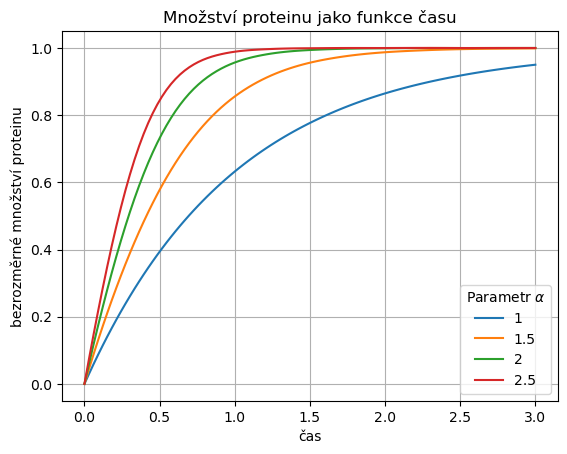

In [7]:
meze = [0,3]                # definice počátečního a koncového časového okamžiku
t = np.linspace(*meze, 100) # definice intervalu pro kreslení funkcí času
reseni = np.array([
    solve_ivp(
        lambda t, x: alpha_ - (alpha_-1)*x**3 - x,
        meze, 
        [0], 
        t_eval=t).y[0]  
    for alpha_ in alpha
    ]).T

plt.plot(t,reseni)

ax = plt.gca()
ax.set(
    title="Množství proteinu jako funkce času", 
    xlabel='čas', 
    ylabel='bezrozměrné množství proteinu',
    )
plt.grid()
plt.legend(
    alpha,
    title=r"Parametr $\alpha$"
    );

Čím vyšší hodnota koeficientu $\alpha$, tím je počáteční produkce rychlejší a
dříve je dosaženo potřebného množství enzymu. Toto se děje při konstantní zpětné
vazbě a konstantním stacionárním stavu (všechny rovnice mají člen popisující
degradaci ve tvaru $-x$ a stacionární stav $x=1$). 

#### Negativní zpětná vazba urychluje syntézu



Vidíme, že negativní zpětná vazba příznivě ovlivňuje rychlost syntézy proteinu.
Tím je buňce umožněno zareagovat rychle na vnější podmínky, aniž by za to
platila cenou rychlé degradace, jako bez zpětné vazby (současně přidávání plynu
a brzdění). Taková zpětná vazba může být zprostředkována například tím, že
protein vstupuje do jiných chemických reakcí.

Příroda zařadila i do jednoduchých organismů typu buňka takových zpětných vazeb
obrovské množství a dlouholetou evolucí vyladila hodnoty parametrů tak, aby
potřebné proteiny vznikaly přesně v době, kdy jsou potřeba a aby dostatečně
rychle vznikly v potřebné koncentraci. To je zařízeno mutacemi v genech. Chybou
v přepise genů například může vzniknout zpětná vazba, která do té doby
neexistovala. Pokud se projeví jako  užitečná, dává svému nositeli evoluční
výhodu a šíří se dál. Podobně se během milionů let vyladí parametry této zpětné
vazby, například hodnota parametru $\alpha$. Těmito problémy zabývá věda
nazývaná systémová biologie. Tato věda prodělala bouřlivý rozvoj v letech okolo
roku 2000, kdy byly vyvinuty účinné postupy pro získávání potřebných dat o
genech a proteinech a tento rozvoj pokračuje dodnes. 

Poznatky, na kterých je založen tento model, jsou potvrzeny experimentálně.
Používá se například vnesení genu způsobujícího světélkování do genetické
informace bakterií.